In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

# import fitter
from HMC import HMC
import sys
sys.path.append("..")
from MCMC_DianZhang.Dian_BayesianInference.Dian_BayesianInference.MultiGaussianLikeli import Likelihood_MultidimensionalGaussian

### Data and visualization
With extension to `MCMC_DianZhang/test.ipynb`.

Visualise the distribution $N(\left( \begin{array}{c} 0 \\ 0 \end{array}\right),\left( \begin{array}{cc} 2.5 & 0.5 \\ 0.5 & 2 \end{array}\right))$.  

In [2]:
mean = [0, 0]
cov = [[2.5, 0.5], [0.5, 2]]
rv = multivariate_normal(mean=mean, cov=cov)
dataset = np.random.multivariate_normal(mean,cov,100)

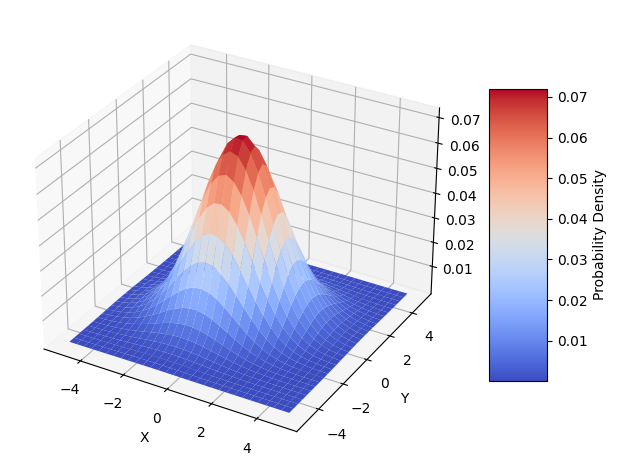

In [3]:
# number of points (30, 30)
X, Y = np.mgrid[-5.:5.:30j, -5.:5.:30j]

# Need an (N, 2) array of (x, y) pairs
DATA = np.dstack((X.flat, Y.flat))
Z = rv.pdf(DATA)
# reshape back to a (30, 30) grid
Z = Z.reshape(X.shape)

fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('X')
ax.set_ylabel('Y')
#ax.set_zlabel('Probability Density')
surf = ax.plot_surface(X,Y,Z,cmap='coolwarm')
#wire = ax.plot_wireframe(X,Y,Z,cmap='coolwarm')

fig.colorbar(surf, shrink=0.65,aspect=5,label='Probability Density')
plt.tight_layout()
plt.show()

/var/folders/09/6kd4cffd1c91y_kc5vxpf0vc0000gn/T/ipykernel_66304/1480310642.py:5: UserWarning: The following kwargs were not used by contour: 'level'
  plt.contourf(X, Y, Z, level=15, cmap='Blues')


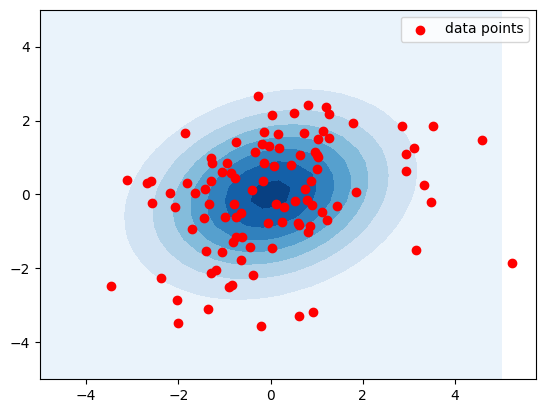

In [34]:
X, Y = np.mgrid[-5.:5.:30j, -5.:5.:30j]
DATA = np.dstack((X, Y))
Z = rv.pdf(DATA)

plt.contourf(X, Y, Z, level=15, cmap='Blues')
plt.scatter(dataset[:,0],dataset[:,1],label='data points',color='red')
plt.legend()
plt.show()

### Likelihood for a 2D Gaus

In [5]:
Likeli = Likelihood_MultidimensionalGaussian(Dim=2, Sigma=cov, Dataset=dataset)

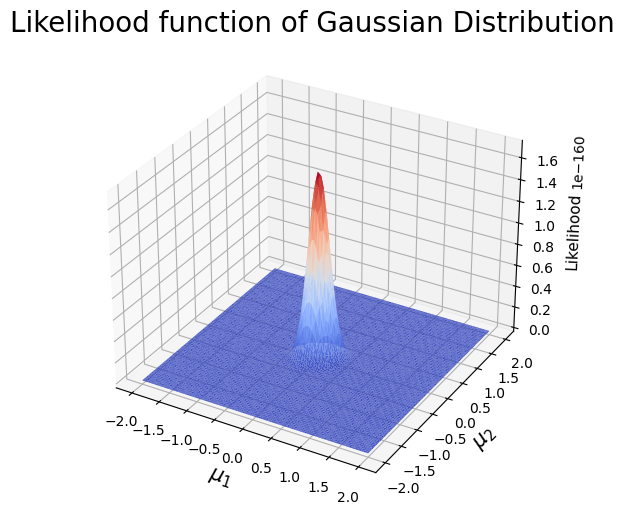

In [72]:
Grid = np.linspace(-2, 2, 100)
x = []
y = []
z = []
r = len(Grid)

for g in Grid:
    y += list(Grid+mean[1])
    x += [g+mean[0]]*r
    z += [Likeli.L([g+mean[0], k+mean[1]]) for k in Grid]
# x, y, z = np.array(x), np.array(y), np.array(z)
# z = z.reshape((100,100))

fig = plt.figure(figsize=(10,6),facecolor="white")

Gau = fig.add_subplot(projection="3d")
Gau.plot_trisurf(x, y, z, cmap='coolwarm')
Gau.set_xlabel("$\mu_1$", fontsize=15)
Gau.set_ylabel("$\mu_2$", fontsize=15)
Gau.set_zlabel("Likelihood", fontsize=11)
Gau.set_title("Likelihood function of Gaussian Distribution", fontsize=20)

plt.show()

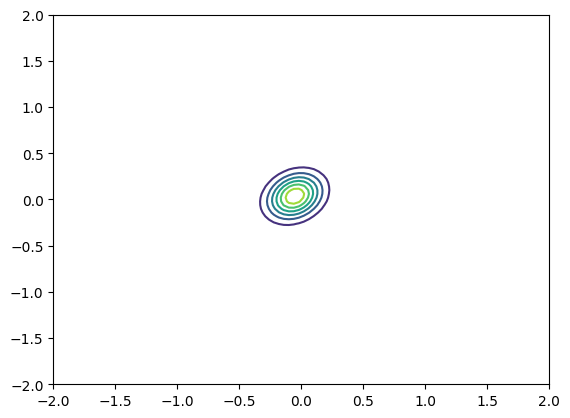

In [73]:
x_, y_ = list(Grid+mean[0]), list(Grid+mean[1])
z_ = np.array(z)
z_ = z_.reshape((len(x_),len(y_)))
plt.contour(x_,y_,z_)

#### using `numpyro`

In [97]:
from numpyro import distributions

target_dist = distributions.MultivariateNormal(
    np.array([0, 0]), np.array([[2.5, 0.5], 
                           [0.5, 2]]))

def target_log_prob_fn(state):
    return target_dist.log_prob(state)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


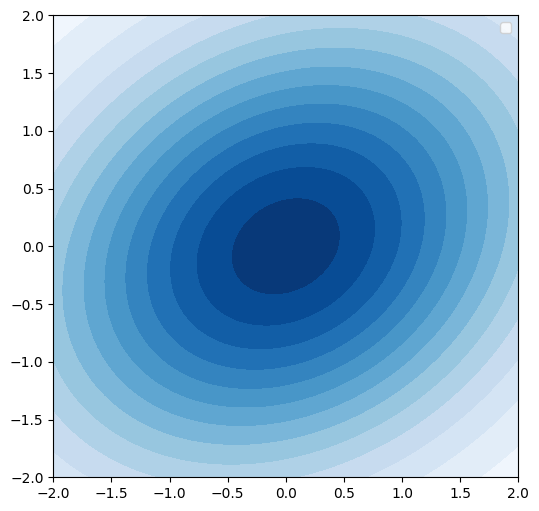

In [100]:
X, Y = np.meshgrid(np.linspace(-2, 2, 100), 
                   np.linspace(-2, 2, 100), 
                  )

_X = np.stack([X, Y]).reshape(2, -1)
probs = np.exp(target_log_prob_fn(_X.T).reshape((100, 100)))

fig, ax = plt.subplots(figsize=(6,6))
ax.contourf(
    X, Y,
    probs, 
    levels=15,
    cmap='Blues'
)

ax.legend()

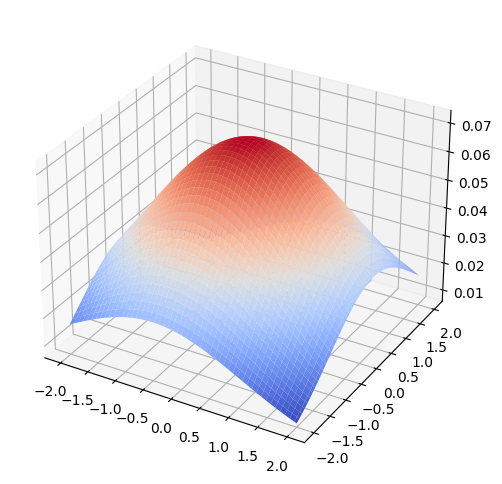

In [84]:
fig = plt.figure(figsize=(10,6),facecolor="white")

ax = fig.add_subplot(projection="3d")
ax.plot_surface(X,Y,probs,cmap='coolwarm')

### Likelihood for MultiGaus

In [122]:
from numpyro import distributions

mean = [1, 1], [5, 5]
cov = [[1, 0], [0, 1]], [[2, 0], [0, 2]]

target_dist = distributions.MultivariateNormal(
    np.array(mean), np.array(cov))

def target_log_prob_fn(state):
    return target_dist.log_prob(state)

In [128]:
probs[:,0].shape

(10000,)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


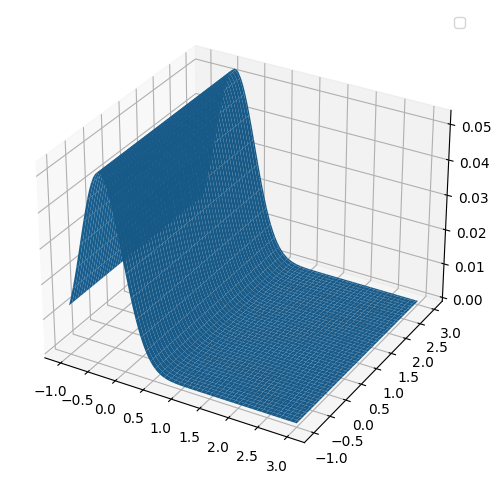

In [130]:
X1, Y1 = np.meshgrid(np.linspace(-1, 3, 100), 
                   np.linspace(-1, 3, 100), 
                  )

X2, Y2 = np.meshgrid(np.linspace(0, 10, 100), 
                   np.linspace(0, 10, 100), 
                  )

_X1 = np.stack([X1, Y1]).reshape(2, -1)
_X2 = np.stack([X2, Y2]).reshape(2, -1)
probs = np.exp(target_log_prob_fn(np.dstack((_X1.T,_X2.T))))


fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(projection='3d')
ax.plot_surface(X1,Y1,probs[:,0].reshape(100,100))

# ax.contourf(
#     X1, Y1,
#     probs1, 
#     levels=15,
#     cmap='Blues'
# )

ax.legend()

### HMC